<a href="https://colab.research.google.com/github/adii2512/BML-Practical-s-/blob/main/Experiment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import files
uploaded = files.upload()

Saving Titanic Dataset.csv to Titanic Dataset (2).csv


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
import pandas as pd

df = pd.read_csv("Titanic Dataset (1).csv")
df = df.drop(["name", "ticket", "cabin", "boat", "body", "home.dest"], axis=1)


In [26]:
df = pd.read_csv("Titanic Dataset (1).csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [27]:
# Drop columns that are not useful for prediction
df = df.drop(columns=["name", "ticket", "cabin", "boat", "body", "home.dest"], errors='ignore')

# Fill missing values
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Encode categorical columns
label = LabelEncoder()
df["sex"] = label.fit_transform(df["sex"])
df["embarked"] = label.fit_transform(df["embarked"])

df.head()


/tmp/ipython-input-3322777421.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/tmp/ipython-input-3322777421.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.00,0,0,211.3375,2
1,1,1,1,0.92,1,2,151.5500,2
2,1,0,0,2.00,1,2,151.5500,2
3,1,0,1,30.00,1,2,151.5500,2
4,1,0,0,25.00,1,2,151.5500,2


In [28]:
X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.767175572519084


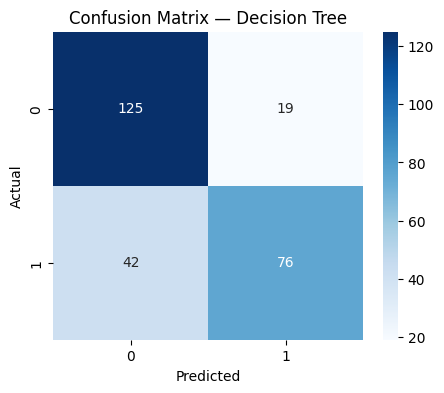

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


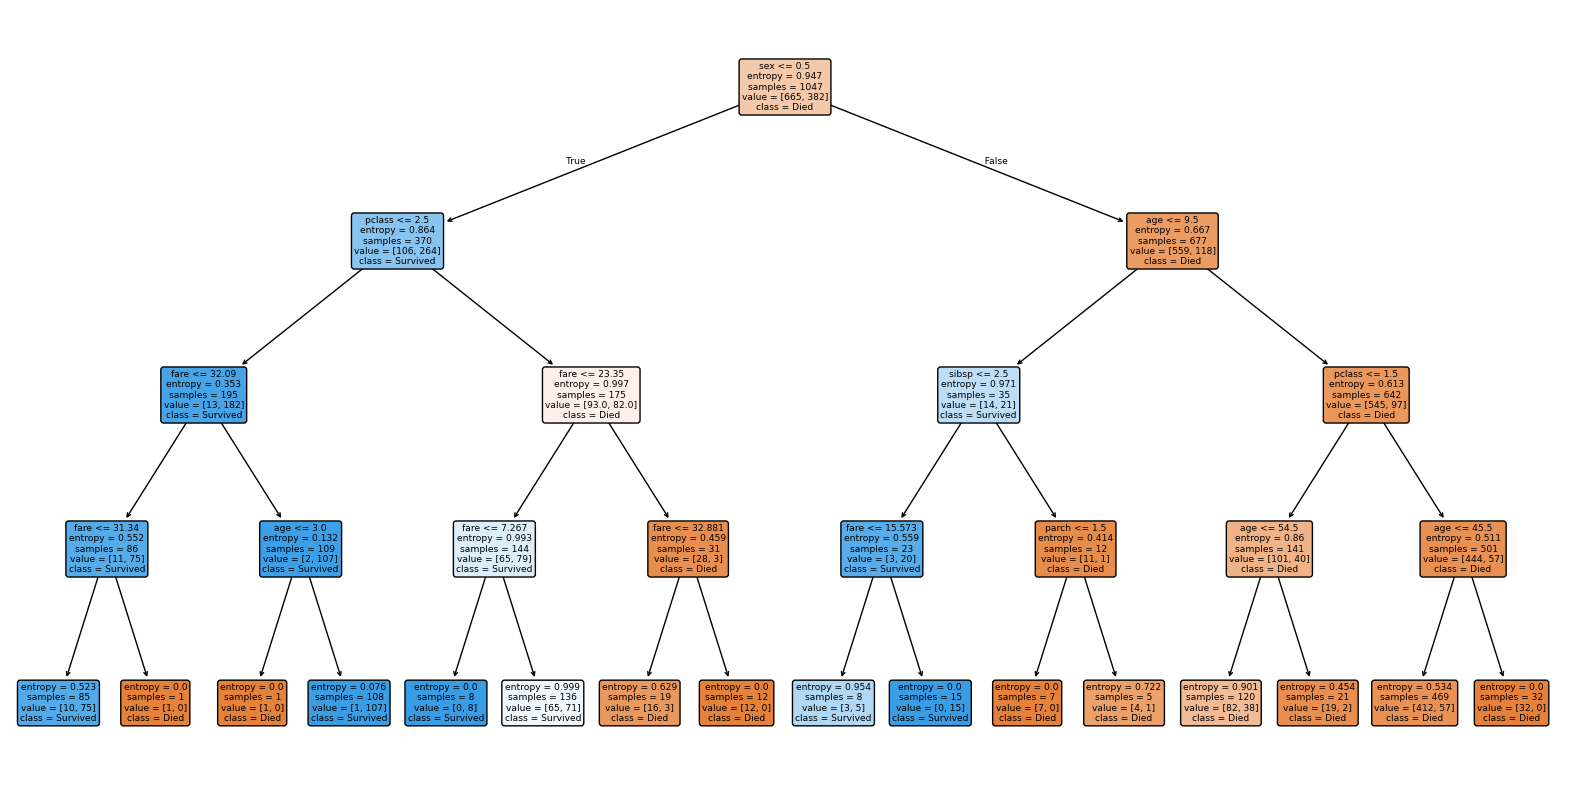

In [31]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=["Died", "Survived"]
)
plt.show()


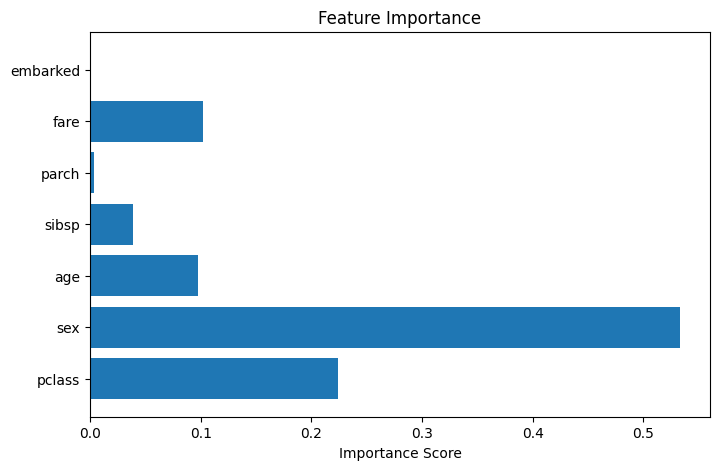

In [32]:
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importance)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()
